In [1]:
import warnings as w
w.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('UberDataset.csv')

In [4]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
dataset.shape

(1156, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

-- removing nan to not in purpose column.
-- changing the format of start_date and end_date to date and time from object
-- extracting date and time seperately in two columns
-- adding a categorical data , which specifies whether the uber is book at morning , afternoon , evening ,night according to time

In [7]:
dataset['PURPOSE'].fillna('NOT' , inplace = True)

In [8]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'] , errors = 'coerce') 
# 'coerce' means if there is wrong date value then it convert to NAT (not a time)

dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'] , errors = 'coerce') 

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [11]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date

In [12]:
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [13]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [14]:
dataset['day-night'] = pd.cut(x = dataset['time'],bins = [0,10,15,19,24] , labels = ['Morning','Afternoon','Evening','Night'])

In [15]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   date        421 non-null    object        
 8   time        421 non-null    float64       
 9   day-night   414 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [17]:
dataset.dropna(inplace = True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


NaT behaves like NaN in pandas
so the column which has NAT also dropped

# Question 

# 1) In which Category do people book the most uber ride

-- plotting a garph to see which is the category
   --- Business is most category which use uber

# 2) For which purpose does people book uber ride most

--  meeting is purpose so people book uber most 

# Data Visualization

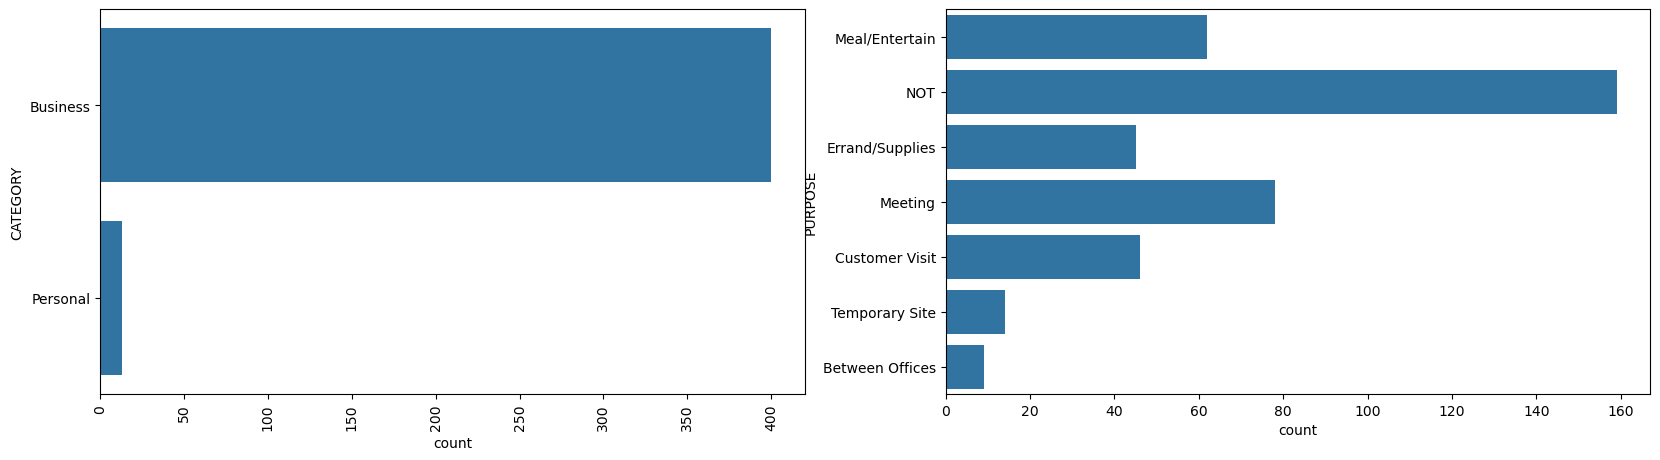

In [19]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1) # (number rows , number of columns , which to use)

sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.show()

# 3) At what time do people book cabs the most from uber


-- booked mostly at afternoon

<Axes: xlabel='count', ylabel='day-night'>

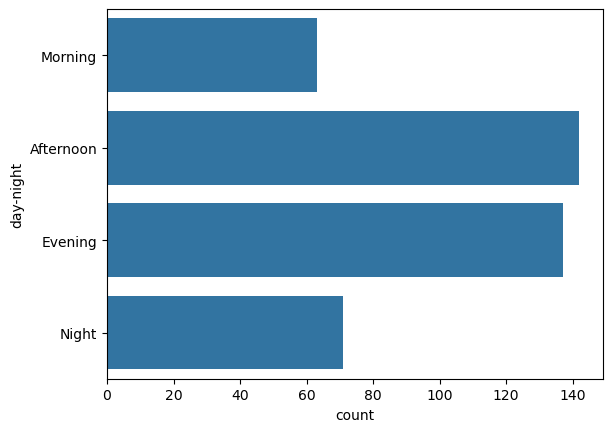

In [20]:
sns.countplot(dataset['day-night'])

# 4 ) In which month people book uber rides less frequently

-- september is month when less uber rides are booked

In [21]:
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date

In [22]:
dataset['month'] = pd.DatetimeIndex(dataset['date']).month

In [23]:
dataset['month'] = dataset['month'].replace({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'

})

In [24]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January
...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon,December
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon,December
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,December
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,December


<Axes: xlabel='count', ylabel='month'>

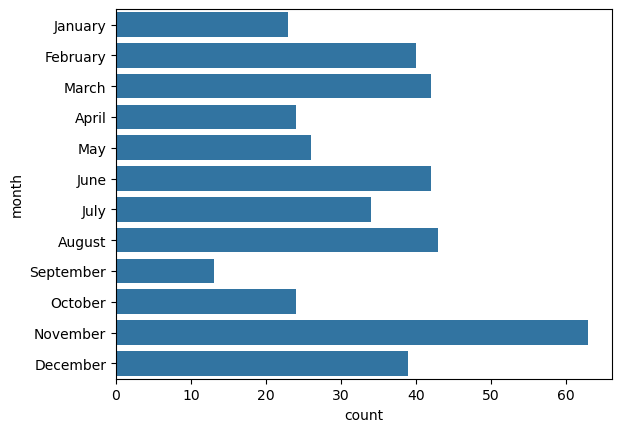

In [25]:
sns.countplot(dataset['month'])

In [26]:
dataset.drop('month' , axis = 1,inplace = True)

In [27]:
# this is one way , now with another method so running df again making require changes

In [28]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month   
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

In [29]:
dataset["MONTH"] = dataset.MONTH.map(month_label) # Number months ko string name se replace karta hai
mon = dataset.MONTH.value_counts(sort=False)  # Har month ke counts calculate karta hai

In [30]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


In [31]:
df = pd.DataFrame({
    "MONTHS": mon.values,  # Har month ka total count.
    "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max()  # Har month ke max MILES ka value
})


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

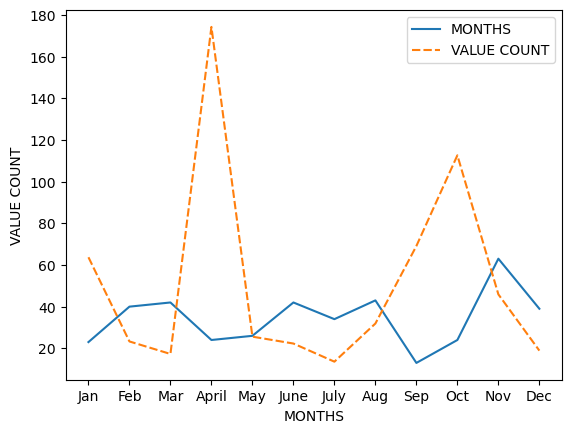

In [32]:
p = sns.lineplot(data=df)  # Line plot banata hai.
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")  # Axis labels set karta ha

# 5) On which days of week people book uber ride most

-- On friday people use most uber ride

In [33]:
dataset['DAY'] = dataset.START_DATE.dt.weekday

day_label = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

dataset['DAY'] = dataset['DAY'].map(day_label)

In [34]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


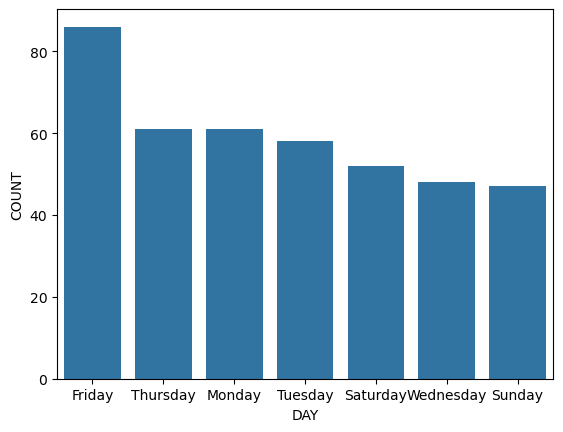

In [35]:
day_label = dataset.DAY.value_counts()

sns.barplot(x = day_label.index , y = day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

-- also on sunday people use less uber ride 

# 6) How many miles do people usually book a cab through uber

In [36]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


<Axes: ylabel='MILES'>

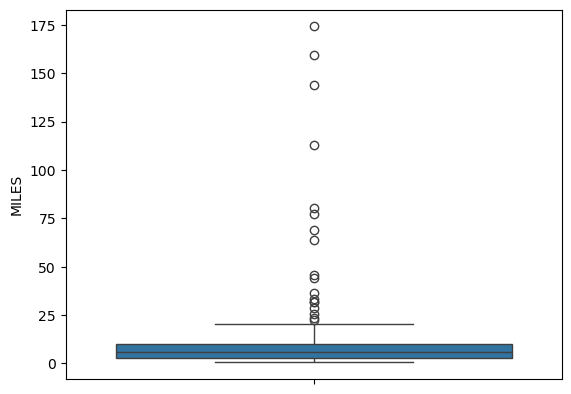

In [37]:
sns.boxplot(dataset['MILES'])

In [38]:
# too get clear insight see miles under 100

<Axes: ylabel='MILES'>

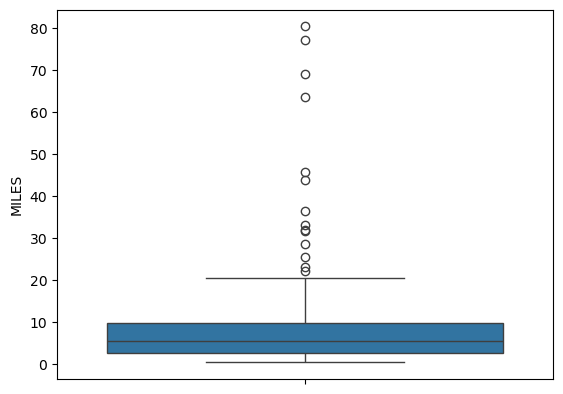

In [39]:
sns.boxplot(dataset[dataset['MILES'] < 100]['MILES'])

<Axes: ylabel='MILES'>

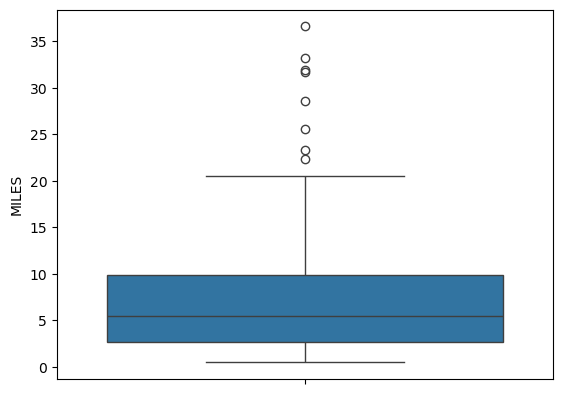

In [40]:
sns.boxplot(dataset[dataset['MILES'] < 40]['MILES'])

<Axes: xlabel='MILES', ylabel='Density'>

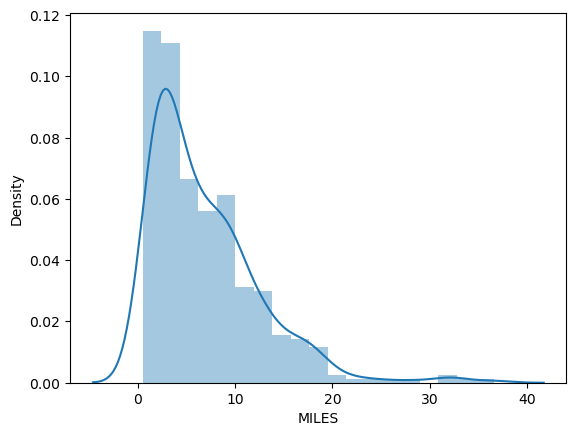

In [41]:
sns.distplot(dataset[dataset['MILES'] < 40]['MILES'])

-- FOR 0 to 20 miles people use uber

# 7) Does booking behavior change by time of day across weekdays and weekends?

In [42]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


In [43]:
dataset['WeekDay'] = dataset['DAY']

In [44]:
mapping = {
    'Monday': 'Yes',
    'Tuesday': 'Yes',
    'Wednesday': 'Yes',
    'Thursday': 'Yes',
    'Friday': 'Yes',
    'Saturday': 'NO',
    'Sunday': 'NO'
}

dataset['WeekDay'] = dataset['WeekDay'].map(mapping)


In [45]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY,WeekDay
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday,NO
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday,NO
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday,Yes


In [46]:
# yes means weekdays and no weekend

<Axes: xlabel='day-night', ylabel='count'>

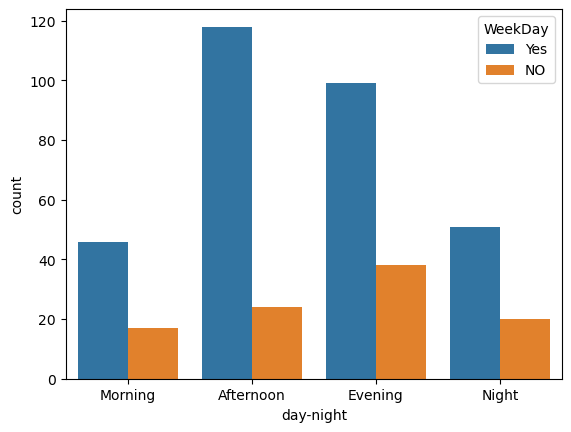

In [47]:
sns.countplot(
    x='day-night',
    hue='WeekDay',
    data=dataset
)


-- Weekdays show higher morning and evening demand, indicating office commute.
-- Weekends have relatively higher night bookings, suggesting leisure travel.
-- Overall booking pattern differs clearly between weekdays and weekends.

# 8 ) Which trip purpose leads to longer rides on average?

In [48]:
purpose = dataset['PURPOSE'].unique()

In [49]:
miles = []
for i in purpose:
    miles_sum = dataset[dataset['PURPOSE'] == i]['MILES'].mean()
    print(f"Average ride for {i} is {miles_sum} miles")
    miles.append(miles_sum)

Average ride for Meal/Entertain is 4.840322580645161 miles
Average ride for NOT is 7.063522012578615 miles
Average ride for Errand/Supplies is 4.208888888888889 miles
Average ride for Meeting is 13.97307692307692 miles
Average ride for Customer Visit is 18.639130434782608 miles
Average ride for Temporary Site is 7.757142857142857 miles
Average ride for Between Offices is 10.933333333333334 miles


In [50]:
miles

[4.840322580645161,
 7.063522012578615,
 4.208888888888889,
 13.97307692307692,
 18.639130434782608,
 7.757142857142857,
 10.933333333333334]

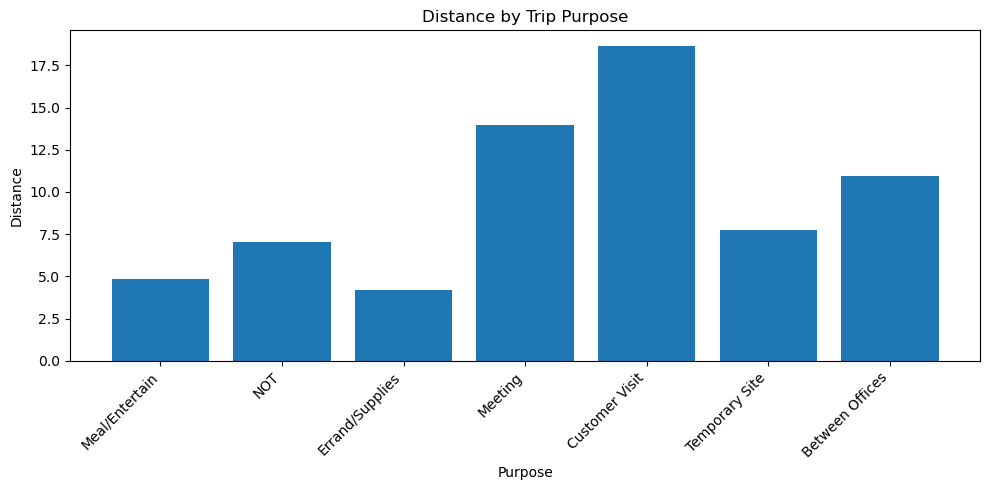

In [51]:


plt.figure(figsize=(10, 5))
plt.bar(purpose,miles)

plt.xlabel('Purpose')
plt.ylabel('Distance')
plt.title('Distance by Trip Purpose')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


-- Customer Visit trips lead to the longest rides on average, followed by Meeting and Between Offices purposes.

# 9) Are Uber rides more frequent but shorter, or less frequent but longer? 

In [52]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY,WeekDay
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday,NO
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday,NO
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday,Yes


In [53]:
dataset['MILES'].describe()

count    413.000000
mean       9.120823
std       16.517267
min        0.500000
25%        2.700000
50%        5.700000
75%        9.900000
max      174.200000
Name: MILES, dtype: float64

75% of rides are less distance
Most Uber rides are short-distance trips

In [54]:
count = dataset['START'].values

In [55]:
c = []

In [56]:
for i in range(1,414):
    c.append(i)


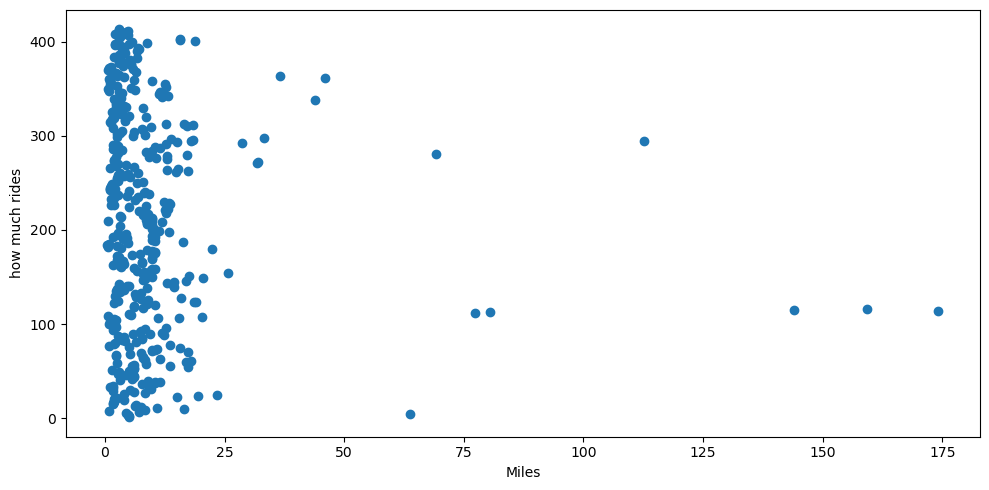

In [57]:
plt.figure(figsize=(10, 5))
plt.scatter(dataset['MILES'],c)


plt.xlabel("Miles")
plt.ylabel('how much rides')
plt.tight_layout()
plt.show()

Uber usage is mostly dominated by short trips.
Approximately 75% of rides are under 10 miles
there are  a few long-distance rides exist they are rare , it means that Uber rides are more frequent but shorter rather than less frequent but longer.

# 10) Do longer rides tend to occur at specific times of the day?

In [59]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY,WeekDay
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Saturday,NO
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday,NO
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday,Yes


In [100]:
longer_ride = dataset[dataset['MILES'] > 25]

In [102]:
long_ride_counts = longer_ride['day-night'].value_counts()
long_ride_counts


day-night
Evening      6
Morning      5
Afternoon    3
Night        2
Name: count, dtype: int64

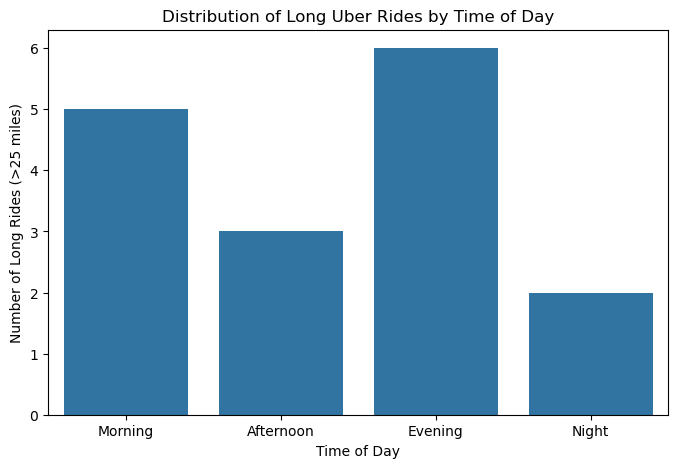

In [103]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=long_ride_counts.index,
    y=long_ride_counts.values
)
plt.xlabel("Time of Day")
plt.ylabel("Number of Long Rides (>25 miles)")
plt.title("Distribution of Long Uber Rides by Time of Day")
plt.show()


-- Long-distance Uber rides occur more frequently during the afternoon and evening compared to morning and night.

# 11) Do weekdays or weekends have longer rides on average?

In [115]:
avg_miles_by_daytype = dataset.groupby('WeekDay')['MILES'].mean()
print(avg_miles_by_daytype)


WeekDay
NO     12.084848
Yes     8.186306
Name: MILES, dtype: float64


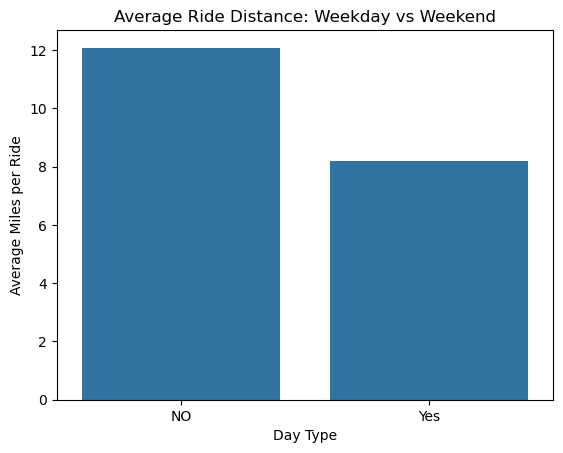

In [116]:
sns.barplot(
    x=avg_miles_by_daytype.index,
    y=avg_miles_by_daytype.values
)

plt.xlabel("Day Type")
plt.ylabel("Average Miles per Ride")
plt.title("Average Ride Distance: Weekday vs Weekend")
plt.show()

-- Uber rides booked on weekends tend to be longer on average compared to weekdays.

## Conclusion

In this project, Uber ride data was analyzed using Python and Pandas to answer different analytical questions.
The analysis helped in understanding ride patterns based on time, date, and other factors.
By solving these questions, useful insights about Uber usage and customer behavior were obtained.
This project improved my data analysis skills and practical understanding of working with real-world datasets.
